# Disk Internal Structures

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Disk-Internal-Structures" data-toc-modified-id="Disk-Internal-Structures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Disk Internal Structures</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-notebook,-we-are-also-interested-in-understanding-the-disk-internal-structures-(you-can-extend-the-content-here-to-understand-their-evolution).-Different-visualizations-may-help-us-form-a-better-idea-of-what-is-going-on.--For-example,-we-explore-different-ways,-in-the-next-few-cells,-to-visualize-the-spirals-of-the-MW-stellar-disks." data-toc-modified-id="In-this-notebook,-we-are-also-interested-in-understanding-the-disk-internal-structures-(you-can-extend-the-content-here-to-understand-their-evolution).-Different-visualizations-may-help-us-form-a-better-idea-of-what-is-going-on.--For-example,-we-explore-different-ways,-in-the-next-few-cells,-to-visualize-the-spirals-of-the-MW-stellar-disks.-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>In this notebook, we are also interested in understanding the disk internal structures (you can extend the content here to understand their evolution). Different visualizations may help us form a better idea of what is going on.  For example, we explore different ways, in the next few cells, to visualize the spirals of the MW stellar disks.</a></span></li><li><span><a href="#A-common-way-in-PPD-observations-to-make-spirals-more-obvious-is-to-plot-stuff-in-the-$(r,-\theta)$-frame.-Below-we-apply-the-same-method." data-toc-modified-id="A-common-way-in-PPD-observations-to-make-spirals-more-obvious-is-to-plot-stuff-in-the-$(r,-\theta)$-frame.-Below-we-apply-the-same-method.-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>A common way in PPD observations to make spirals more obvious is to plot stuff in the $(r, \theta)$ frame. Below we apply the same method.</a></span></li><li><span><a href="#To-make-the-spirals-stand-out-more,-we-can-scale-the-content-(point-size-in-scatter-plots,-or-color-in-colormaps)-with-a-function-of-radius.-Here,-we-scale-the-point-size-with-$\ln(r^2)$." data-toc-modified-id="To-make-the-spirals-stand-out-more,-we-can-scale-the-content-(point-size-in-scatter-plots,-or-color-in-colormaps)-with-a-function-of-radius.-Here,-we-scale-the-point-size-with-$\ln(r^2)$.-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>To make the spirals stand out more, we can scale the content (point size in scatter plots, or color in colormaps) with a function of radius. Here, we scale the point size with $\ln(r^2)$.</a></span></li><li><span><a href="#Combined-with-the-picture-below,-you-may-select-a-desired-model-to-fit-the-spirals-(by-overplotting-on-the-figure-or-performing-more-calculations)-to-obtain,-for-example,-the-pitch-angle." data-toc-modified-id="Combined-with-the-picture-below,-you-may-select-a-desired-model-to-fit-the-spirals-(by-overplotting-on-the-figure-or-performing-more-calculations)-to-obtain,-for-example,-the-pitch-angle.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Combined with the picture below, you may select a desired model to fit the spirals (by overplotting on the figure or performing more calculations) to obtain, for example, the pitch angle.</a></span></li></ul></li></ul></li><li><span><a href="#3D-Interactive-Visualization-with-Plotly" data-toc-modified-id="3D-Interactive-Visualization-with-Plotly-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3D Interactive Visualization with Plotly</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#If-you-want-to-visualize-disk-particles-in-3D-and-see-how-the-stellar-disk-looks-like-in-different-perspectives,-the-following-cell-gives-you-an-example." data-toc-modified-id="If-you-want-to-visualize-disk-particles-in-3D-and-see-how-the-stellar-disk-looks-like-in-different-perspectives,-the-following-cell-gives-you-an-example.-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>If you want to visualize disk particles in 3D and see how the stellar disk looks like in different perspectives, the following cell gives you an example.</a></span></li><li><span><a href="#Check-out-their-documentation-for-more-examples:-3D-Scatter-Plots-in-Python" data-toc-modified-id="Check-out-their-documentation-for-more-examples:-3D-Scatter-Plots-in-Python-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Check out their documentation for more examples: <a href="https://plotly.com/python/3d-scatter-plots/" target="_blank">3D Scatter Plots in Python</a></a></span></li></ul></li></ul></li></ul></div>

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as c

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Plotly's Python graphing library makes interactive, publication-quality graphs
import plotly.graph_objects as plygo

In [2]:
from pathlib import Path

# import my own classes
from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse
from galaxy.centerofmass import CenterOfMass
from galaxy.surfacedensity import SurfaceDensityProfile

In [3]:
%matplotlib inline

## Disk Internal Structures

#### In this notebook, we are also interested in understanding the disk internal structures (you can extend the content here to understand their evolution). Different visualizations may help us form a better idea of what is going on.  For example, we explore different ways, in the next few cells, to visualize the spirals of the MW stellar disks.

<IPython.core.display.Javascript object>


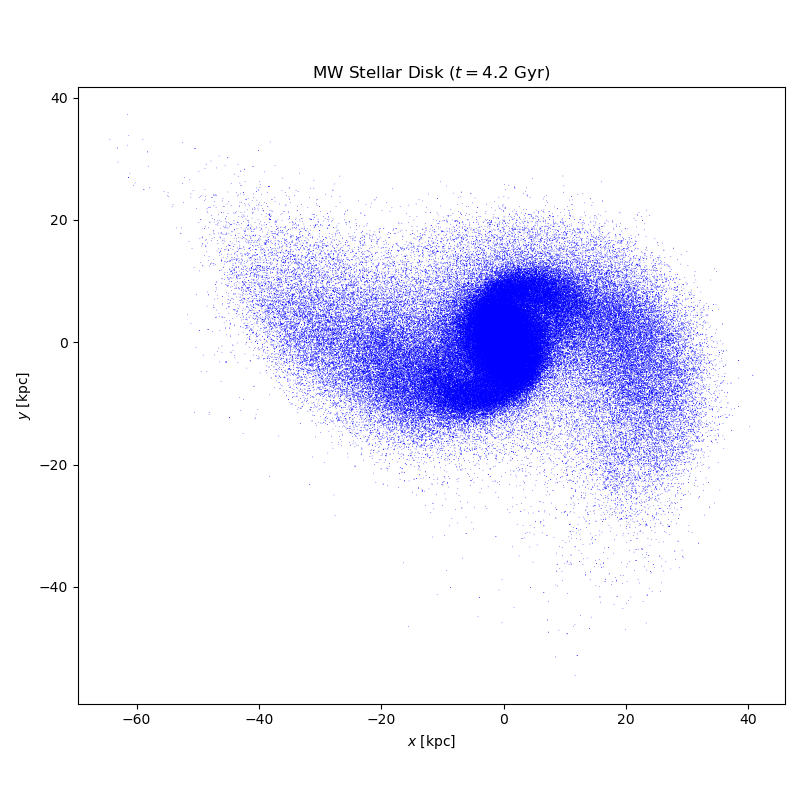

In [55]:
# we can simply plot all particles in a projected view
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(sdp['MW_295'].alg_r[0,:], sdp['MW_295'].alg_r[1,:], ec="None", fc='b', s=0.25)

ax.set(xlabel=r"$x$ [kpc]", ylabel=r"$y$ [kpc]", aspect=1.0,
       title="MW Stellar Disk ($t={:.1f}$ Gyr)".format(sdp['MW_295'].t.value/1e3))
fig.tight_layout()

#### A common way in PPD observations to make spirals more obvious is to plot stuff in the $(r, \theta)$ frame. Below we apply the same method.

<IPython.core.display.Javascript object>


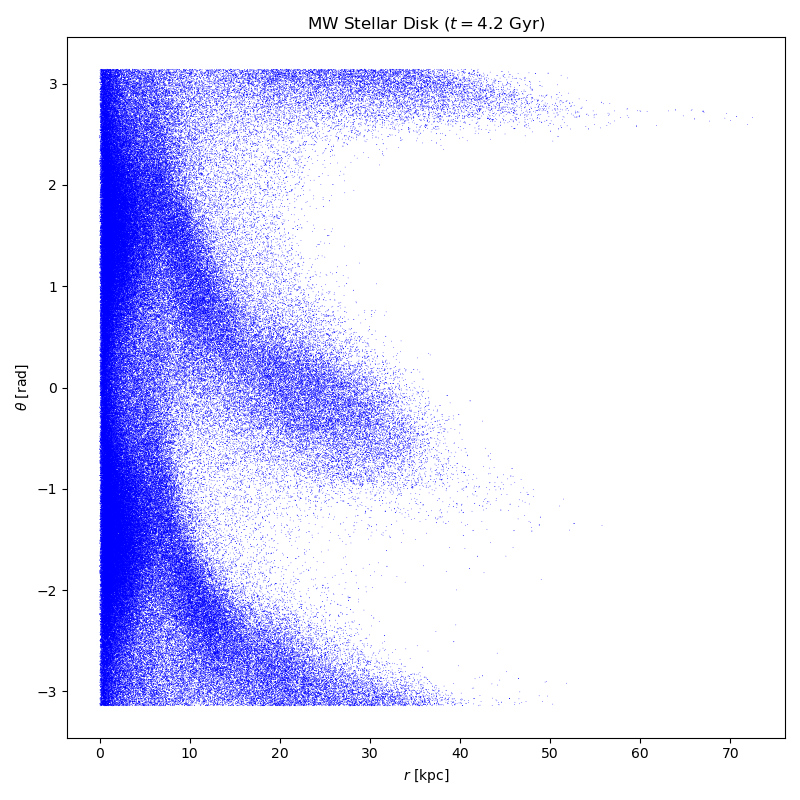

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(sdp['MW_295'].cyl_r_mag, sdp['MW_295'].cyl_theta, ec="None", fc='b', s=0.25)
ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\theta$ [rad]",
       title="MW Stellar Disk ($t={:.1f}$ Gyr)".format(sdp['MW_295'].t.value/1e3))
fig.tight_layout()

#### To make the spirals stand out more, we can scale the content (point size in scatter plots, or color in colormaps) with a function of radius. Here, we scale the point size with $\ln(r^2)$. 

#### Combined with the picture below, you may select a desired model to fit the spirals (by overplotting on the figure or performing more calculations) to obtain, for example, the pitch angle.

<IPython.core.display.Javascript object>


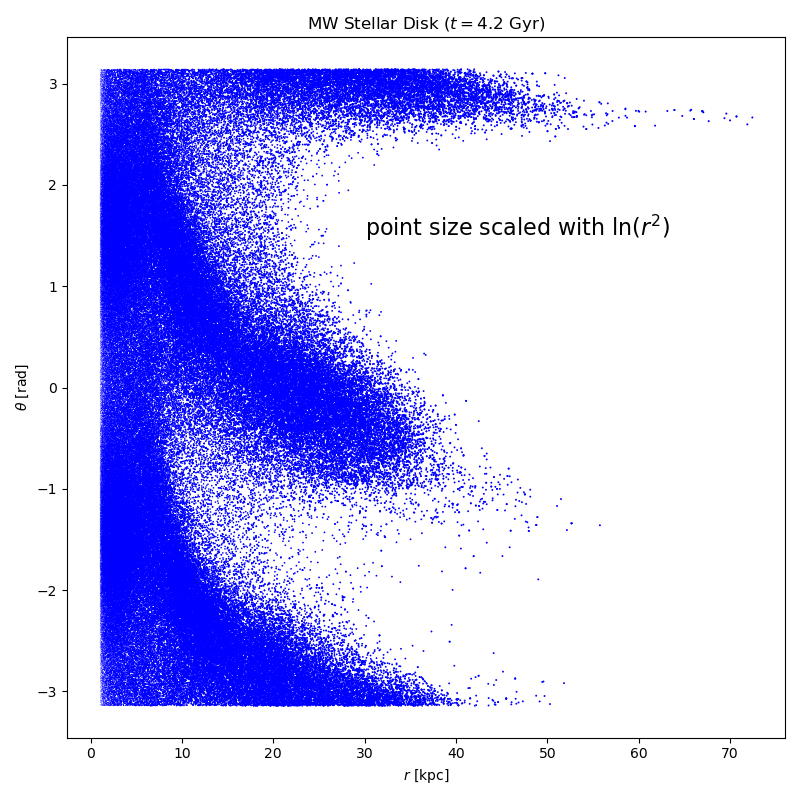

/home/colin/.pyenv/versions/miniconda3-4.2.12/envs/400b/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(sdp['MW_295'].cyl_r_mag, sdp['MW_295'].cyl_theta, ec="None", fc='b', 
           s=0.25*np.log(sdp['MW_295'].cyl_r_mag**2))
ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\theta$ [rad]", 
       title="MW Stellar Disk ($t={:.1f}$ Gyr)".format(sdp['MW_295'].t.value/1e3))
ax.text(30, 1.5, 'point size scaled with $\ln(r^2)$', fontsize=16)
fig.tight_layout()

## 3D Interactive Visualization with Plotly

#### If you want to visualize disk particles in 3D and see how the stellar disk looks like in different perspectives, the following cell gives you an example.

#### Check out their documentation for more examples: [3D Scatter Plots in Python](https://plotly.com/python/3d-scatter-plots/)

In [61]:
layout = plygo.Layout(width=1024, height=800, autosize=False, showlegend=True, scene=dict(aspectmode='data', 
                      xaxis_title='x/kpc', yaxis_title='y/kpc', zaxis_title='z/kpc',                                                                    
                      camera=dict(up=dict(x=0,y=0,z=1), center=dict(x=0,y=0,z=0), eye=dict(x=-0.75,y=-1.25,z=1.5))))
data = [plygo.Scatter3d(x=sdp['MW_295'].alg_r[0,::5], 
                        y=sdp['MW_295'].alg_r[1,::5,], 
                        z=sdp['MW_295'].alg_r[2,::5], 
                        mode='markers', marker=dict(size=1, opacity=0.8, color='blue'), 
                        name=r"Sample N_par="+str(sdp['MW_295'].alg_r[::5].shape[0]))]
fig = plygo.Figure(data=data, layout=layout)

# make it a tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), legend=dict(x=0.05, y=0.95, bordercolor="Black", borderwidth=2))
fig.show(renderer='notebook')

# if you want to save the interactive visualization into a HTML file and share with others, 
# uncomment the following line
#fig.write_html("portable_visualization.html")